[Reference](https://medium.com/codex/introduction-to-time-series-forecasting-smoothing-methods-9a904c00d0fd)

In [1]:
import itertools
import warnings
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = sm.datasets.co2.load_pandas()
y = data.data
y.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [3]:
y = y['co2'].resample('MS').mean()

In [4]:
y.isnull().sum()

5

In [5]:
y = y.fillna(y.bfill())

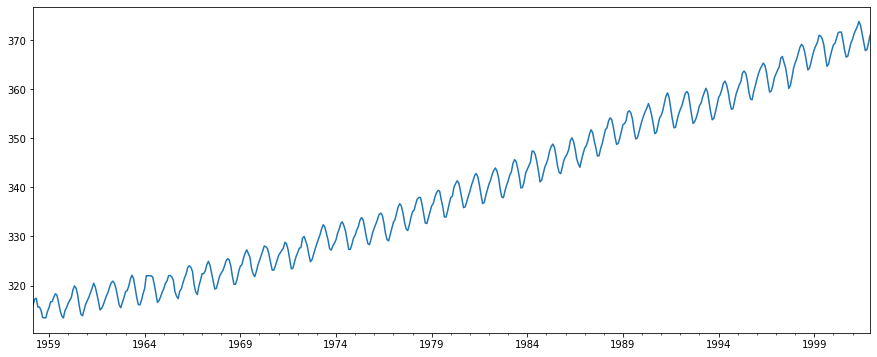

In [6]:
y.plot(figsize=(15, 6))
plt.show()

# Creating A Function To Compare Train, Test and Forecasted Values


In [7]:
def plot_co2(train, test, y_pred, title):
    """
        This function to visualize the act and predicted value of y
    """
    mae = mean_absolute_error(test, y_pred)
    train["1985":].plot(legend=True, label="TRAIN", title=f"{title}, MAE: {round(mae,2)}")
    test.plot(legend=True, label="TEST", figsize=(6, 4))
    y_pred.plot(legend=True, label="PREDICTION")
    plt.show()

# Creating TES Model


In [8]:
# from 1958 to end of the 1997
train = y[:'1997-12-01']
len(train)  # 478 month
# from 1998 to first month of the 2001
test = y['1998-01-01':]
len(test)  # 48 ay

48

In [10]:
tes_model = ExponentialSmoothing(train,
   trend="add",
   seasonal="add",
   seasonal_periods=12
   ).fit(smoothing_level=0.5,
         # smoothing_trend=0.5,
         smoothing_seasonal=0.5
   )

In [11]:
y_pred = tes_model.forecast(48)

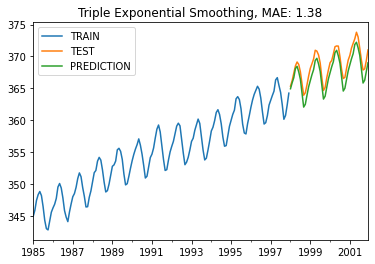

In [12]:
plot_co2(train, test, y_pred, "Triple Exponential Smoothing")

# Hyperparameter Optimization for Triple Exponential Smoothing


In [18]:
def tes_optimizer(train, test, abg, trend_mode='add', seasonal_mode = 'add', seasonal_period=12,step=48):
    """
        This function to optimize hyperparameters for the TES model
    """
    best_alpha, best_beta, best_gamma, best_mae = None, None, None, float("inf")
    for comb in abg:
            tes_model = ExponentialSmoothing(train, trend=trend_mode, seasonal=seasonal_mode, seasonal_periods=seasonal_period).\
                fit(smoothing_level=comb[0], smoothing_seasonal=comb[2])
            y_pred = tes_model.forecast(step)
            mae = mean_absolute_error(test, y_pred)
            if mae < best_mae:
                best_alpha, best_beta, best_gamma, best_mae = comb[0], comb[1], comb[2], mae
            print([round(comb[0], 2), round(comb[1], 2), round(comb[2], 2), round(mae, 2)])
    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_gamma:", round(best_gamma, 2),
            "best_mae:", round(best_mae, 4))
    return best_alpha, best_beta, best_gamma, best_mae

In [19]:
alphas = betas = gammas = np.arange(0.10, 1, 0.20)
abg = list(itertools.product(alphas, betas, gammas))

In [20]:
best_alpha, best_beta, best_gamma, best_mae = tes_optimizer(train,test, abg)

[0.1, 0.1, 0.1, 1.26]
[0.1, 0.1, 0.3, 1.29]
[0.1, 0.1, 0.5, 1.35]
[0.1, 0.1, 0.7, 1.41]
[0.1, 0.1, 0.9, 3.07]
[0.1, 0.3, 0.1, 1.26]
[0.1, 0.3, 0.3, 1.29]
[0.1, 0.3, 0.5, 1.35]
[0.1, 0.3, 0.7, 1.41]
[0.1, 0.3, 0.9, 3.07]
[0.1, 0.5, 0.1, 1.26]
[0.1, 0.5, 0.3, 1.29]
[0.1, 0.5, 0.5, 1.35]
[0.1, 0.5, 0.7, 1.41]
[0.1, 0.5, 0.9, 3.07]
[0.1, 0.7, 0.1, 1.26]
[0.1, 0.7, 0.3, 1.29]
[0.1, 0.7, 0.5, 1.35]
[0.1, 0.7, 0.7, 1.41]
[0.1, 0.7, 0.9, 3.07]
[0.1, 0.9, 0.1, 1.26]
[0.1, 0.9, 0.3, 1.29]
[0.1, 0.9, 0.5, 1.35]
[0.1, 0.9, 0.7, 1.41]
[0.1, 0.9, 0.9, 3.07]
[0.3, 0.1, 0.1, 1.18]
[0.3, 0.1, 0.3, 1.13]
[0.3, 0.1, 0.5, 1.15]
[0.3, 0.1, 0.7, 2.72]
[0.3, 0.1, 0.9, 2.68]
[0.3, 0.3, 0.1, 1.18]
[0.3, 0.3, 0.3, 1.13]
[0.3, 0.3, 0.5, 1.15]
[0.3, 0.3, 0.7, 2.72]
[0.3, 0.3, 0.9, 2.68]
[0.3, 0.5, 0.1, 1.18]
[0.3, 0.5, 0.3, 1.13]
[0.3, 0.5, 0.5, 1.15]
[0.3, 0.5, 0.7, 2.72]
[0.3, 0.5, 0.9, 2.68]
[0.3, 0.7, 0.1, 1.18]
[0.3, 0.7, 0.3, 1.13]
[0.3, 0.7, 0.5, 1.15]
[0.3, 0.7, 0.7, 2.72]
[0.3, 0.7, 0.9, 2.68]
[0.3, 0.9,

# Final The Best TES Model


In [23]:
final_tes_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12).fit(smoothing_level=best_alpha, smoothing_seasonal=best_gamma)

In [24]:
y_pred = final_tes_model.forecast(48)